<a href="https://colab.research.google.com/github/izumizawa/mc886y2021/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
## MC886 A - Machine Learning
### Profª Esther Colombini
#### First Semester 2021

# Group

- Mariana Megumi Izumizawa - RA 221859
- Matheus Carvalho Hatzlhoffer- RA 222174

# Part I - Clustering Methods

Implementation of k-means and another unsupervised learning method, in our case it is DBSCAN (Density Based Spatial Clustering of Application with Noise).

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math

## Data splitting in training and test sets
Returns first `training set` and then `test set` depending on the percentage in argument.

In [99]:
def split_data(data, test_percent):
  test_numbers = int(round(test_percent*len(data)))
  shuffled_data = data[:]
  random.shuffle(shuffled_data)
  return shuffled_data[test_numbers:], shuffled_data[:test_numbers]

## Distance calculation

In [93]:
def euclidian_distance(a, b):
  return math.sqrt(math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))

## Pre-processing data

Data normalization using the following formula:

![Formula](https://miro.medium.com/max/341/0*oRhJXkyKqqYp8--e.)

In [11]:
def normalization(data):
  max_x = np.max(data, axis=0)[0]
  min_x = np.min(data, axis=0)[0]
  max_y = np.max(data, axis=0)[1]
  min_y = np.min(data, axis=0)[1]
  for x in data:
    x[0] = (x[0] - min_x)/(max_x - min_x)
    x[1] = (x[1] - min_y)/(max_y - min_y)

### K-means implementation

In [94]:
def k_means(k, data):
  centers = np.array(random.sample(list(data), k))
  old_centers = np.zeros(centers.shape)
  clusters = []

  for i in range(k):
    clusters.append([])

  while not (np.array_equal(old_centers, centers)):
    for i in range(k):
      clusters[i] = []
    old_centers = deepcopy(centers)
    for i in range(len(data)):
      winner_distance = math.sqrt(math.pow(np.max(data, axis=0)[0], 2) + math.pow(np.max(data, axis=0)[1], 2))
      winner_cluster = 0
      for j in range(len(centers)):
        distance = euclidian_distance(centers[j], data[i])
        if (distance < winner_distance):
          winner_distance = distance
          winner_cluster = j
      clusters[winner_cluster].append(list(data[i].astype(float)))

    for i in range(k):
      center_x = np.mean([x[0] for x in clusters[i]])
      center_y = np.mean([x[1] for x in clusters[i]])
      centers[i] = [center_x, center_y]

  return centers, clusters

## Show clusters with different colors

In [139]:
def print_clusters(centers, clusters):
  clusters = np.array(clusters, dtype=object)
  for i in range(len(clusters)):
    clusters[i] = np.array(clusters[i])

  colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
  for y, c in zip(clusters, colors):
      plt.scatter(y[:,0], y[:,1], color=c)

  plt.scatter(centers[:,0], centers[:,1], c='black')
  plt.grid()
  plt.title("Clustered with k-means")
  plt.show()

## Apply functions with given dataset (`cluster.dat`)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cluster.dat to cluster.dat


In [102]:
string_data = ([np.array(x.split(" ")) for x in uploaded['cluster.dat'].decode("utf-8").split('\n')])
# Cleaning data
string_data = string_data[:-1]
data = np.array([x.astype(float) for x in string_data])

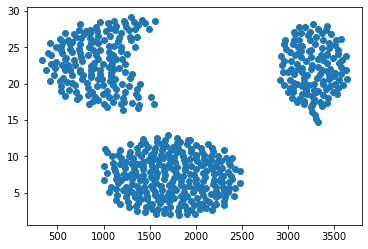

In [103]:
plt.scatter(data[:,0], data[:,1])

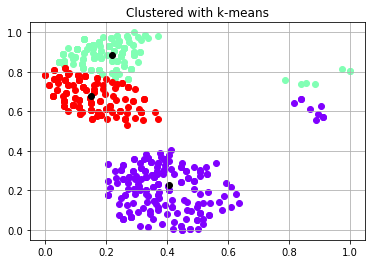

In [140]:
training_set, test_set = split_data(data, 0.1)
normalization(training_set)
centers, clusters = k_means(3, training_set)
print_clusters(centers, clusters)

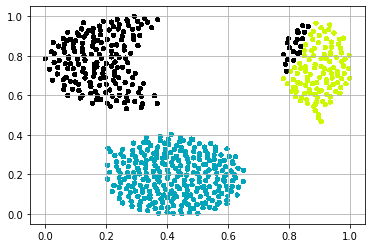

In [130]:
eps = 0.5
min_points = 4
# normalization(data)

cluster_id = 0
clusters = [-1]*len(data)
distances = []
for i in range(len(data)):
  if(clusters[i] == -1):
    neighbor_count = 0
    neighbors = []
    for j in range(len(data)):
      dist = euclidian_distance(data[j], data[i])
      distances.append(dist)
      if (dist <= eps):
        neighbor_count += 1
        neighbors.append(j)
    if (neighbor_count >= min_points):
      for x in neighbors:
        if (clusters[x] == -1):
          clusters[x] = cluster_id
    cluster_id += 1

if(cluster_id != 0):
  for i in range(len(data)):
    colors = cm.nipy_spectral(np.array(clusters).astype(float) / cluster_id)
    plt.scatter(data[:,0], data[:,1], color=colors, s=10)
plt.grid()
plt.show()



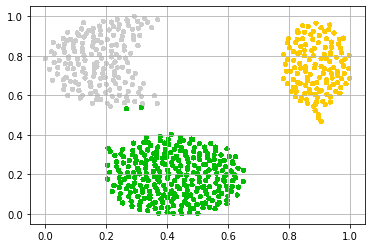

In [87]:
eps = 0.4
min_points = 5
normalization(data)

cluster_id = 2
clusters = [1]*len(data)
distances = []
shuffle_index = np.arange(len(data))
np.random.shuffle(shuffle_index)

for i in shuffle_index:
  if(clusters[i] == 1):
    neighbor_count = 0
    neighbors = []
    for j in range(len(data)):
      dist = euclidian_distance(data[j], data[i])
      distances.append(dist)
      if (dist <= eps):
        neighbor_count += 1
        neighbors.append(j)
    if (neighbor_count >= min_points):
      for x in neighbors:
        if (clusters[x] == 1):
          clusters[x] = cluster_id
      cluster_id += 1

if(cluster_id != 2):
  for i in range(len(data)):
    colors = cm.nipy_spectral(np.array(clusters).astype(float) / (cluster_id-1))
    plt.scatter(data[:,0], data[:,1], color=colors, s=10)
plt.grid()
plt.show()

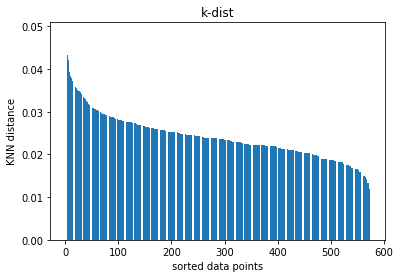

In [138]:
k = 3
def k_nearest_neighbor(k, data):
  k_distances = []
  for i in range(len(data)):
    point_distances = []
    for j in range(len(data)):
      distance = euclidian_distance(data[i], data[j])
      point_distances.append(distance)
    point_distances.sort()
    k_distances.append(point_distances[k-1]) # K neighbor
  k_distances.sort(reverse = True)
  x = [y+1 for y in range(len(data))]
  plt.bar(x, k_distances)
  plt.title("k-dist")
  plt.xlabel("sorted data points")
  plt.ylabel("KNN distance")
  plt.show()

k_nearest_neighbor(3, data)